## Classification

### binary classification

- Email: Spam / Not Spam
- Online Transactions: Fraudulent(Yes / No)?
- Tumor: Malignant / Benign

$ y \in \{0, 1\}$ 

0: "Negative Class" (e.g., beginer tumor)<br>
1: "Positive Class" (e.g, malignant tumor)

<u>classification problem is just like regression problem, except that the values we now want to predict take on only a small number of discrete values,</u>

## Hypothesis Representation

### Logistic Regression Model

Want $0 \leq h_\theta \leq 1$<br>

- $h_\theta(x) \geq 0.5 \rightarrow y = 1$
- $h_\theta(x) < 0.5 \rightarrow y = 0$

$h_\theta(x) = g(\theta^Tx)$

$g(z) = \frac{1}{1 + e^{-z}}$<br>
$\rightarrow$ <b>"Logistic function"</b> (Sigmoid function)

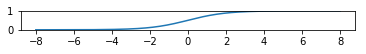

In [2]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
z = np.linspace(-8, 8, 300)
y = 1 / (1 + np.exp(-z))
plt.ylim([-0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(z, y)

### Interpretation of Hypothesis Output

$h_\theta(x)$ = estimated probablity that y = 1 on input x

example:  Tumor: Malignant(1) / Benign(0)<br>
$x_\theta(x) = 0.7$<br>
$\rightarrow$ Tell pationt that 70% chance of tumor being malignant

$h_\theta(x) = P(y = 1 | x; \theta)$<br>
$\rightarrow$ "probablity that y = 1, given x, parameterized by $\theta$"

## Decision Boundry

### Logistic regression

$h_\theta(x) = g(\theta^Tx)$<br>
$g(z) = \frac{1}{1 + e^{-z}}$

Suppose:
predict "y = 1" if $h_\theta(x) \geq 0.5$<br>
$\rightarrow \theta^Tx \geq 0$<br>
predict "y = 0" if $h_\theta(x) < 0.5$<br>
$\rightarrow \theta^Tx < 0$<br>
<u>reference logistic model graph</u>

for example
$h_\theta(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2)$<br>
$\theta = \begin{bmatrix}
5\\-1\\0
\end{bmatrix}
$

predict: $"y = 1" if 5 + (-1)x_1 + 0x_2 \geq 0$<br>
$\rightarrow 5 - x_1 \geq 0$<br>
$\rightarrow x_1 \leq 5$

### Non-linear decision boundaries

$h_\theta(x) = g(\theta_0 + \theta_1x_1 +\theta_2x_2 + \theta_3x_1^2 + \theta_4x_2^2)$

$\theta = 
\begin{bmatrix}
-1\\0\\0\\1\\1
\end{bmatrix}$

predict: "y = 1" if $-1 + x_1^2 + x_2^2 \geq 0$<br>
$\rightarrow x_1^2 + x_2^2 \geq 1$

<hr>
## Cost Function

### Logistic regression cost function

$Cost(h_\theta(x), y) = \begin{array}
-log(h_\theta(x)) & if \, y = 1\\
-log(1-h_\theta(x)) & if \, y = 0
\end{array}$

/Users/kawabatayuma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


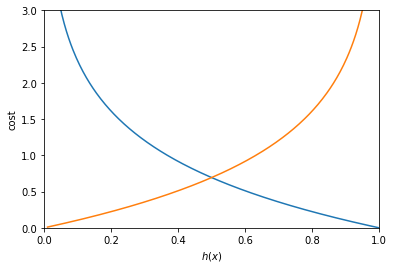

In [2]:
x = np.linspace(0.01, 1, 300)
y = -np.log(x)
plt.xlim([0, 1])
plt.ylim([0, 3])
plt.xlabel("$h(x)$")
plt.ylabel("cost")

plt.plot(x, y, label="-log(h(x))")

y = -np.log(1 - x)
plt.plot(x, y, label="-log(1 - h(x))")
plt.show()

## Simplified Cost Function and Gradient Descent

### Simplified Cost Function

$\begin{align}
J(\theta) &= \frac{1}{m}\sum_{i=1}^m{Cost(h_\theta(x^{(i)}), y^{(i)})}\\
&= -\frac{1}{m}\sum_{i=1}^m[y^{(i)}logh_\theta(x^{(i)}) + (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))]
\end{align}
$

To fit paraneter $\theta$:<br>
$min_\theta J(\theta)$

To make prediction given new x:<br>
Output $h_\theta(x) = \frac{1}{1+e^{-\theta^{-T}x}}$

<b><u>Using this $J(\theta)$ instead of $(h_\theta(x) - y)^2$, <br>
we always found minimam value</u></b>

### gradient Descent

$
Repeat\{\\
\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta)\\
\}
$

$
Repeat\{\\
  \theta_j := \theta_j - \frac{\alpha}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j\\
\}
$

A vectorized implementation is:<br>
$\theta := \theta - \frac{\alpha}{m}X^T(g(X\theta) - \vec{y})$

## Advanced Optimization

### Optimization algorithm

Given $\theta$, we have code that can compute
- $J(\theta)$
- $\frac{\partial}{\partial\theta_j}J(\theta)$ (for j = 0, 1, ....., n)

Optimization algorithms:
- Gradient Descent
- Conjugate gradient　★
- BFGS　★
- L-BFGS　★

★ Advantages:
- No need to manually pick $\alpha$
- Often faster than gradient descent

★ Disadvantages
- More Complex

To use above sophiscated optimizer, we first need to provide a finction that the following two functions for a given $\theta$
- $J(\theta)$
- $\frac{\partial}{\partial\theta_j}J(\theta)$

We can write a single function that returns both of these(Octave):
```
function [jVal, gradient] = costFunction(theta)
  jVal = [...code to compute J(theta)...];
  gradient = [...code to compute derivative of J(theta)...];
end
```

Then, we can use octave's "fminunc()" optimization algorithm alog with the "optimset()" function that creates an object containing the options we want to send to "fminunc()".
```
options = optimset('GradObj', 'on', 'MaxIter', 100);
initialTheta = zeros(2,1);
   [optTheta, functionVal, exitFlag] = fminunc(@costFunction, initialTheta, options);
```

We give to the function "fminunc()" our cost function, our initial vector of theta values, and the "options" object that we created beforehand.


## Multiclass Classification: One-vs-all

### Multiclass classification

- Email foldering/tagging: Work(y=1), Friends(y=2), Family(y=3), Hobby(y=4)
- Medical diagrams: Not ill(y=1), Cold(y=2), Flu(y=3)
- Weather: Sunny(y=1), Cloudy(y=2), Rain(y=3), Snow(y=4)<br>
ext..

### One-vs-all (one-vs-rest)

Train a logistic regression classifier $h^{(i)}_\theta(x)$ for each class $i$ to predict the probability that $y = i$.

On a new input $x$, to make a prediction, pick the class $i$ that maximizes<br>
$\rightarrow\max_ih^{(i)}_\theta(x)$

<hr>
## The problem of Overfitting

### Overfitting:
if we have too many features, the learned hypothesis may fit the training set very well ($J(\theta) = \frac{1}{2m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})^2 \simeq 0$), but fail to generalize to new example (predict prices on new example).

### Addressing overfitting

Options*
1. Reduce number of features
    - Manually select which features to keep
    - Model selection algorithm
2. Regularization
    - Keep all the features, but reduce magnitude/value of parameter $\theta_j$ 
    - Works well when we have a lot of features, each of which contribute a bit to predicting $y$.

## Cost function

### Regularization

Small values for parameters $\theta_0, \theta_1, ......, \theta_n$
- "Simplert" hypothesis
- Less prone to overfitting

$J(\theta) = \frac{1}{2m}[\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\sum^{\mu}_{i=1}\theta^2_j]$

if $\lambda$ is set to an exaremely large<br>
$\rightarrow$ underfitting

## regularized Linear Regression

### Gradient Descent

$J(\theta) = \frac{1}{2m}[\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\sum^{\mu}_{i=1}\theta^2_j]$

Repeat{<br>
$
\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)} - y^{(i)}))x^{(i)}_0\\
\theta_j := \theta_j - \alpha\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)} - y^{(i)}))x^{(i)}_j + \frac{\lambda}{m}\theta_j\\
\rightarrow\theta_j := \theta_j(1 - \alpha\frac{\lambda}{m}) - \alpha\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$<br>
(j = 1, 2, 3, ......,n)<br>
}

$(1 - \alpha\frac{\lambda}{m})$ < 1<br>
but this value is nearly 1 (like 0.99)<br>
~ All thing we must do is , parameter $\theta$ decrease small.

### Normal equation

$X = \begin{bmatrix}
(x^{(1)})^T\\...\\(x^{(m)})^T
\end{bmatrix}$
$y = \begin{bmatrix}
y{(i)}\\...\\y^{(i)}
\end{bmatrix}$

$\theta = (X^TX + \lambda L)X^Ty$

$L = \begin{bmatrix}
0\\&1\\&&1\\&&&...\\&&&&1
\end{bmatrix}$

<u>Adding $\lambda L$, then $X^TX + \lambda L$ always becomes invertible</u>

## Regularized Logistic Regression

### Gradient descent

Repeat{<br>
$
\theta_0 :=  \theta_0 - \alpha\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_0\\
\theta := \theta_j - \alpha[\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y{(i)})^{(i)}_j + \frac{\lambda}{m}\theta_j]
$<br>
}

### Advanced optimization